# Respiratory Rate Variability Analysis

Respiratory Rate Variability (RRV), or variations in respiratory rhythm, are crucial indices of general health and respiratory complications. This example shows how to use NeuroKit to perform RRV analysis.

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

## Download Data and Extract Relevant Signals

In this example, we will download a dataset that contains electrocardiogram, respiratory, and electrodermal activity signals, and extract only the respiratory (RSP) signal.

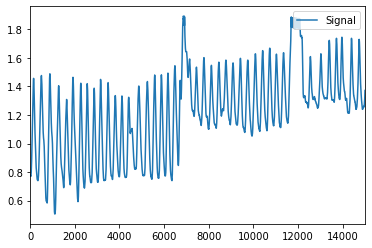

In [2]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/master/data/example_bio_100hz.csv")
rsp = data["RSP"]
nk.signal_plot(rsp) # Visualize

You now have the raw RSP signal in the shape of a vector (i.e., a one-dimensional array). You can then clean it using `rsp_clean()` and extract the inhalation peaks of the signal using `rsp_peaks()`. This will output 1) a *dataframe* indicating the occurrences of inhalation peaks and exhalation troughs ("1" marked in a list of zeros), and 2) a *dictionary* showing the samples of peaks and troughs.

*Note: As the dataset has a frequency of 100Hz, make sure the `sampling_rate` is also set to 100Hz. It is critical that you specify the correct sampling rate of your signal throughout all the processing functions.*

In [3]:
# Clean signal
cleaned = nk.rsp_clean(rsp, sampling_rate=100)

# Extract peaks
df, peaks_dict = nk.rsp_peaks(cleaned) 
peaks_dict

{'RSP_Peaks': array([  501,   881,  1275,  1631,  1917,  2267,  2556,  2865,  3154,
         3490,  3812,  4111,  4412,  4865,  5250,  5578,  5878,  6171,
         6483,  6892,  7448,  7783,  8117,  8452,  8769,  9086,  9418,
         9747, 10089, 10415, 10731, 11031, 11351, 11702, 12553, 13023,
        13399, 13721, 13965, 14394], dtype=int64),
 'RSP_Troughs': array([  343,   753,  1104,  1501,  1791,  2140,  2430,  2727,  3032,
         3314,  3687,  3991,  4270,  4695,  5117,  5454,  5759,  6053,
         6347,  6636,  7343,  7660,  7992,  8333,  8566,  8965,  9271,
         9611,  9938, 10286, 10605, 10905, 11216, 11543, 12454, 12876,
        13290, 13618, 13866, 14289], dtype=int64)}

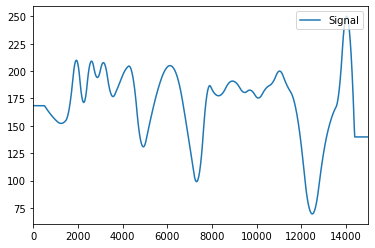

In [4]:
# Extract rate
rsp_rate = nk.rsp_rate(df, desired_length=None) # Note: You can also replace info with peaks dictionary

# Visualize
nk.signal_plot(rsp_rate)

## Analyse RRV

Now that we have extracted the respiratory rate signal and the peaks dictionary, you can then input these into `rsp_rrv()`. This outputs a variety of RRV indices including time domain, frequency domain, and nonlinear features. Examples of time domain features include RMSSD (root-mean-squared standard deviation) or SDBB (standard deviation of the breath-to-breath intervals). Power spectral analyses (e.g., LF, HF, LFHF) and entropy measures (e.g., sample entropy, SampEn where smaller values indicate that respiratory rate is regular and predictable) are also examples of frequency domain and nonlinear features respectively.

A Poincaré plot is also shown when setting `show=True`, plotting each breath-to-breath interval against the next successive one. It shows the distribution of successive respiratory rates.


,RRV_SDBB,RRV_RMSSD,RRV_SDSD,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA
0,998.908514,1235.493722,1252.010077,0.0,107.798195,330.189907,0.326473,0.246121,0.753879,885.304815,1100.850499,1.243471,0.486894,0.705886,0.773903


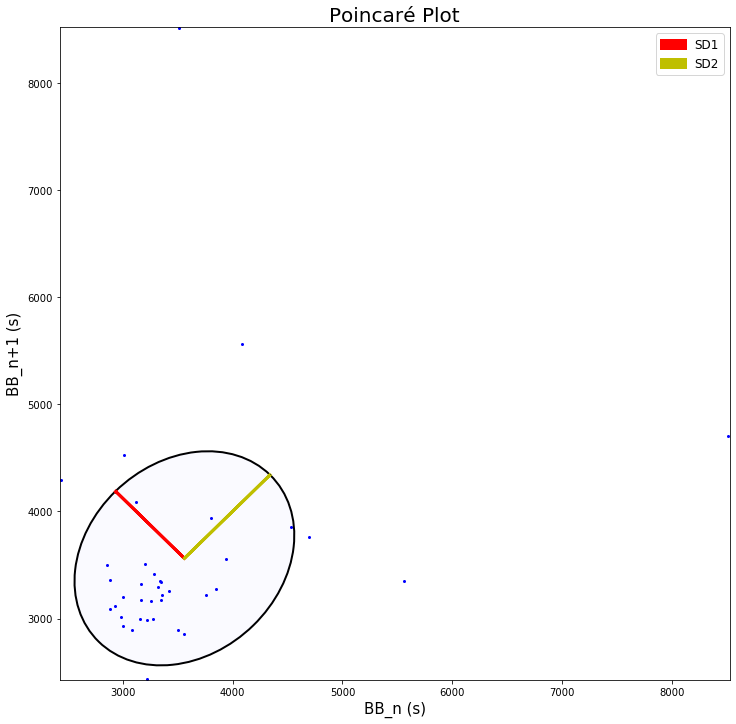

In [6]:
rrv = nk.rsp_rrv(rsp_rate, peaks_dict, sampling_rate=100, show=True)
rrv

This is a simple visualization tool for short-term (SD1) and long-term variability (SD2) in respiratory rhythm. 